# Downloading XKCD dataset

## Installing Packages

In [2]:
from fastai.vision import *
import json
import numpy as np
import pandas as pd

## Scraping Data

XKCD is actually easy to scrape, as comics have unique JSON files with metadata

### Test download the latest comic

In [4]:
url_latest = 'http://xkcd.com/info.0.json'
resp = requests.get(url_latest)

In [5]:
max_num = resp.json()["num"]; max_num

2313

In [6]:
url_img = resp.json()["img"]; url_img

In [7]:
path_data = Path('./data');
path_data.mkdir(parents=True, exist_ok=True)

In [8]:
fname = Path(url_img).name;
path_img = path_data/f'{max_num}_{fname}'; path_img

WindowsPath('data/2313_wrong_times_table.png')

In [9]:
download_url(url_img,path_img)

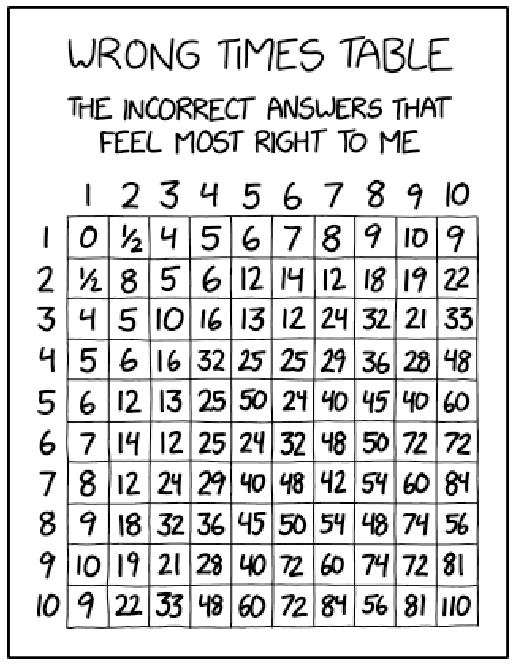

In [10]:
img = open_image(path_img)
img.show(figsize=(12,12))

### Generate list of URLs

In [11]:
np.random.seed(0)

In [13]:
path_data = Path('./data/');
path_data.mkdir(parents=True, exist_ok=True);
path_urls = path_data/'urls_xkcd.csv';

In [ ]:
urls_img = [];
for num in np.random.randint(300,1300,500):
    url_json = f'http://xkcd.com/{num}/info.0.json';
    resp = requests.get(url_json) ;
    urls_img.append([resp.json()["img"],num]);
df = pd.DataFrame(urls_img);
df.to_csv(path_urls,header=False,index=False);

## Download raw images

In [14]:
path_imgs = path_data/'images';
path_imgs.mkdir(parents=True, exist_ok=True);

The Fastai batch download function changes the image filenames, so comic downloads must be performed iteratively.

In [ ]:
path_urls = Path('./data/urls_xkcd.csv');
for [url,num] in pd.read_csv(path_urls,header=None).values:
    fname = Path(url).name;
    download_url(url,dest/f'{num}_{fname}');

Raw images were cropped to one panel, and labelled in `labels_xkcd.csv`

- Labels are stored in `./data/labels_xkcd.csv`
- URLs are stored in `./data/urls_xkcd.csv`
- Images are stored in `./data/images/`